## Assignment 1
COMP47750 Machine Learning with Python

In [1]:
# Import the necessary packages 

import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, recall_score

from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('appendicitis.csv') # Read the data file
df.rename(columns={'Unnamed: 0':'Id'}, inplace = True) ## give the first column the name "id"

## Replace the value of predictive label with 1/0 for better processing later
pd.set_option('future.no_silent_downcasting', True)
df['Diagnosis'] = df['Diagnosis'].replace({'appendicitis': 1, 'no appendicitis': 0}).astype(int)
df.head()

,Id,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Dysuria,Diagnosis
0,0,12.68,16.90,1,148.0,37.0,3.0,4.0,3.0,1,0,1,1,0,0,1,37.0,7.7,0,1
1,672,10.21,15.59,1,145.5,33.0,7.0,9.0,8.0,0,1,1,0,0,1,1,38.4,17.0,0,1
2,671,7.55,16.76,1,136.0,31.0,3.0,5.0,3.0,1,0,1,0,0,0,0,37.8,16.1,0,1
3,670,14.79,23.23,0,166.0,64.0,4.0,7.0,8.0,1,1,1,0,1,1,0,36.8,20.6,0,1
4,669,9.66,16.22,0,149.0,36.0,4.0,10.0,10.0,1,1,1,1,1,1,1,38.0,19.9,0,1


In [3]:
# To understand the features of the data set
df.describe()

,Id,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Body_Temperature,WBC_Count,Dysuria,Diagnosis
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,398.383518,11.377987,18.909097,0.480190,148.369731,43.467211,4.237718,5.925515,5.242472,0.683043,0.274168,0.954041,0.391442,0.285261,0.576862,0.473851,37.402219,12.782964,0.055468,0.618067
std,224.016932,3.473904,4.425827,0.500004,19.577490,17.397465,2.561108,2.143835,1.945243,0.465660,0.446448,0.209562,0.488460,0.451897,0.494449,0.499712,0.919745,5.351765,0.229072,0.486246
min,0.000000,0.000000,7.830000,0.000000,53.000000,3.960000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.900000,2.600000,0.000000,0.000000
25%,218.000000,9.275000,15.735000,0.000000,137.250000,30.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.800000,8.400000,0.000000,0.000000
50%,391.000000,11.440000,18.000000,0.000000,150.000000,41.500000,3.000000,6.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,37.200000,12.200000,0.000000,1.000000
75%,597.500000,13.950000,21.225000,1.000000,163.000000,55.000000,5.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.900000,16.200000,0.000000,1.000000
max,781.000000,17.870000,38.160000,1.000000,190.000000,103.000000,28.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.200000,37.700000,1.000000,1.000000


In [4]:
# to understand the datatypes in the df >> all either integers or floats
df.dtypes

Id                                    int64
Age                                 float64
BMI                                 float64
Sex                                   int64
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                        int64
Migratory_Pain                        int64
Lower_Right_Abd_Pain                  int64
Contralateral_Rebound_Tenderness      int64
Coughing_Pain                         int64
Nausea                                int64
Loss_of_Appetite                      int64
Body_Temperature                    float64
WBC_Count                           float64
Dysuria                               int64
Diagnosis                             int64
dtype: object

In [5]:
# To make sure there is no null value in the dataframe
null_count_by_column = df.isnull().sum()
print(null_count_by_column)

Id                                  0
Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Dysuria                             0
Diagnosis                           0
dtype: int64


In [6]:
# See the number of diagnosis >> majority class is positive (i.e. 61.8% - 390/631 samples with appendicitis)
print(df.groupby('Diagnosis')['Id'].count())
proportions = df.groupby('Diagnosis')['Id'].count() / len(df)
print(proportions)

Diagnosis
0    241
1    390
Name: Id, dtype: int64
Diagnosis
0    0.381933
1    0.618067
Name: Id, dtype: float64


## Q1: Model Training and Evaluation

### Preprocessing the data

In [9]:
y = df.pop('Diagnosis').values # column to predict
df.drop(columns = ['Id'],inplace = True) # drop this column as id shouldn't be used in the classifier 
Xraw = df.values 

# Normalise the data
scaler = StandardScaler() 
X = scaler.fit_transform(Xraw)

### Train the model and measure the performance

In this section, I set up 2 models (KNN and Decision Tree), run cross validation and see the aggregate performance for each model. Cross validation can help us get more reliable estimates of model performance by averaging the performance of models, mitigiating the issue raised by model performance variance, which would be especially large given the small size of the dataset.

In [11]:
# Set the default parameters for the classifier
kNN = KNeighborsClassifier(n_neighbors=3)  
dtree = DecisionTreeClassifier(criterion='entropy')
models = [kNN,dtree]

5 x CV KNeighborsClassifier   

              precision    recall  f1-score   support

           0       0.67      0.60      0.63       241
           1       0.77      0.81      0.79       390

    accuracy                           0.73       631
   macro avg       0.72      0.71      0.71       631
weighted avg       0.73      0.73      0.73       631

Proportion of predictions: {0: 0.35, 1: 0.65}


5 x CV DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       241
           1       0.81      0.81      0.81       390

    accuracy                           0.76       631
   macro avg       0.75      0.75      0.75       631
weighted avg       0.76      0.76      0.76       631

Proportion of predictions: {0: 0.39, 1: 0.61}




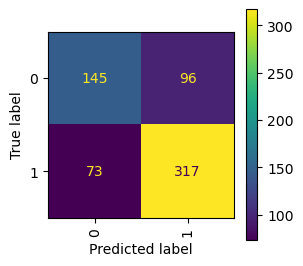

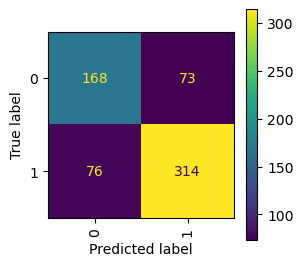

In [12]:
folds = 5  # 5 fold for cross validation
# Create a cross-validation splitter with a fixed random state
cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

for m in models:
    print("{} x CV {:22} \n".format(folds, type(m).__name__))
    y_pred = cross_val_predict(m, X, y, cv=cv) # Perform cross-validation and get predicted labels
    print(classification_report(y, y_pred)) # Print classification report with the aggregate result
    
    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(3,3)) 
    disp = ConfusionMatrixDisplay.from_predictions(y,y_pred, ax = ax, xticks_rotation = 'vertical')

    # Calculate the proportion of prediction by classes
    unique, counts = np.unique(y_pred, return_counts=True)
    proportions = np.round(counts / counts.sum(),2)
    result = dict(zip(unique, proportions))    
    print(f'Proportion of predictions: {result}')
    print("\n")

The above results reveal that the **model is biased towards the majority class (1: appendicitis)** as all these 3 metrics (Precision, Recall and F-1 score) in both classifiers are higher for the majority class (1) than the minority class (0: no appendicitis). This indicates that the classifiers are better at predicting the majority class than the minority class.

The most useful metric in measuring class bias is Recall, as it measures the sensitivity of picking up the correct results (TP / (TP + FN)). As Recall is much higher for the majority class than the minority class, it shows that the classifiers are biased towards the majority class.

Moreover, in the KNN classifier, you can see that 65% of the predicted labels are 1 (appendicitis), which is higher than the original proportion in the data (62%), indicating that the classifier is more likely to predict the majority class.


### Q2: Reducing the bias in the Decision Tree Classifier

Here I will perform a Grid Search to test all combinations of model parameters and use cross validation to evaluate the combinations. I created a custom metric – difference in Recall between majority class and minority class – for optimisation. The goal is to find parameters that can return the smallest Recall difference (custom metric). 

I am also using SMOTE (Synthetic Minority Oversampling Technique) to increase the samples of minority class (no appendicitis) in the dataset in a balanced why by creating synthetic samples. These samples are created by interpolating between existing minority samples and their k-nearest neighbors.

In [16]:
# Create custom scorer that calculates the difference between the recall scores of both classes
def recall_difference_score(y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    return abs(recall_0 - recall_1)  #absolute difference between them

# Make custom scorer for GridSearch (optimise for the lowest difference in Recall between majority and minority class)
custom_scorer = make_scorer(recall_difference_score, greater_is_better=False) #lower difference is better

# Create a cross-validation splitter with a fixed random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('sampler', SMOTE()),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    # parameters to test in SMOTE
    'sampler__sampling_strategy': [0.8, 0.9, 1.0],  
    'sampler__k_neighbors': [3, 5, 7], # different k nearest neighbours
    # parameters to test in decision tree 
    'classifier__max_depth': [3, 4, 5, 6], # control how specific the trees will be 
    'classifier__min_samples_leaf': [5, 10, 15, 20],
    'classifier__class_weight': [{0: 2, 1: 1}, {0: 3, 1: 1}, {0: 4, 1: 1},'balanced',None],  # Higher weights for minority class for rebalancing
    'classifier__criterion': ['gini', 'entropy']
}

# Use custom grid search 
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv= cv, 
    scoring=custom_scorer, # to find the parameters to minimise the recall difference
    n_jobs=-1 # for parallel processing
)

grid_search.fit(X, y)

print("Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Use best model
best_model = grid_search.best_estimator_

Best parameters:
classifier__class_weight: {0: 2, 1: 1}
classifier__criterion: gini
classifier__max_depth: 6
classifier__min_samples_leaf: 20
sampler__k_neighbors: 5
sampler__sampling_strategy: 0.9


### Show classification report and confusion matrix 
Using the best parameters through GridSearch

5 x CV Decision Tree Classifier with Best Parameters 

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       241
           1       0.82      0.75      0.79       390

    accuracy                           0.74       631
   macro avg       0.73      0.74      0.74       631
weighted avg       0.75      0.74      0.75       631

Proportion of predictions: {0: 0.43, 1: 0.57}




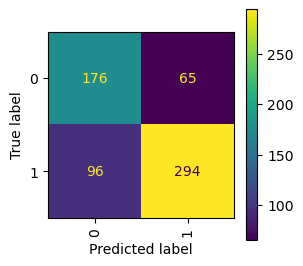

In [47]:
# Create a cross-validation splitter with a fixed random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("5 x CV Decision Tree Classifier with Best Parameters \n")
y_pred = cross_val_predict(best_model, X, y, cv=cv) # Perform cross-validation and get predicted labels
print(classification_report(y, y_pred)) # Print classification report with the aggregate result

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(3,3)) 
disp = ConfusionMatrixDisplay.from_predictions(y,y_pred, ax = ax, xticks_rotation = 'vertical')

# Calculate the proportion of prediction by classes
unique, counts = np.unique(y_pred, return_counts=True)
proportions = np.round(counts / counts.sum(),2)
result = dict(zip(unique, proportions))    
print(f'Proportion of predictions: {result}')
print("\n")

By using Grid Search to test a variety of parameters that could potentially lower the bias for the majority, I was able to see **a drop in difference of Recall between the majority (appendicitis) and minority class (no appendicitis). You can also see a drop in false positives (73 to 65) (i.e. predicted to be appendicitis but actually do not have it)** as well as a higher proportion of predictions in the minority class. The parameters and steps that achieved this, as shown in the Grid Search, are as follows:
1. Used SMOTE to generate synthetic samples for the minority class to create a more balanced training data (with the parameters sampler__k_neighbors: 5, sampler__sampling_strategy: 0.9)
2. Increased the class weight for minority class in the decision tree from 1 to 2
3. Changed the tree selection criterion to gini
4. Limit the classifier depth maximum to 6
5. Set the minimum sample per leaf to be 20

These are the parameters were identified to create a model that product the smallest difference in recall between the 2 classes.

However, this is not without trade off. **The overall accuracy of the model fell slightly from 0.76 to 0.74 and the recall score for the majority class fell from 0.81 to 0.75.** 

I have also attempted a Grid Search to find the best parameters to optimize for accuracy of the model. I was able to boost the accuracy to 0.95. Yet, the model shows a further drop in recall in the minority class. This shows that during model optimisation, we must know what metrics we are aiming to optimise as the steps and strategy could be very different.

### Q3: Reducing the bias in the KNN Classifier

Now I follow the same steps above using Grid Search to find the best parameters that can minimise the difference in Recall between majority and minority class in the KNN classifier. I have changed the parameters to test for the KNN classifier as they have different sets of parameters than Decision Tree.

In [21]:
# Create custom scorer that calculates the difference between the recall scores of both classes
def recall_difference_score(y_true, y_pred):
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    return abs(recall_0 - recall_1)  

# Make custom scorer for GridSearch (optimise for the lowest difference in Recall between majority and minority class)
custom_scorer = make_scorer(recall_difference_score, greater_is_better=False) #lower difference is better

# Create a cross-validation splitter with a fixed random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('sampler', SMOTE()),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    # parameters to test in SMOTE
    'sampler__sampling_strategy': [0.8, 0.9, 1.0],  # More conservative ratios
    'sampler__k_neighbors': [3, 5, 7], # different k nearest neighbours
    # parameters to test in KNN
    'classifier__n_neighbors': [3, 5, 7, 9], # K in the KNN algorithm
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['manhattan','euclidean','minkowski']
}

# Use custom grid search 
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv= cv, 
    scoring=custom_scorer, # to find the parameters to minimise the recall difference
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Put the best parameters in a model
best_model = grid_search.best_estimator_

Best parameters:
classifier__metric: manhattan
classifier__n_neighbors: 9
classifier__weights: uniform
sampler__k_neighbors: 5
sampler__sampling_strategy: 1.0


KNN Classifier 

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       241
           1       0.82      0.75      0.78       390

    accuracy                           0.74       631
   macro avg       0.73      0.74      0.74       631
weighted avg       0.76      0.74      0.75       631

Proportion of predictions: {0: 0.44, 1: 0.56}




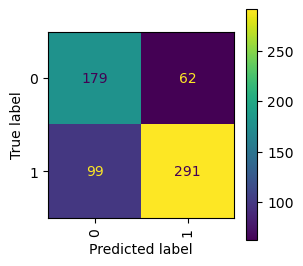

In [22]:
# Create a cross-validation splitter with a fixed random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("KNN Classifier \n")
y_pred = cross_val_predict(best_model, X, y, cv=cv) # Perform cross-validation and get predicted labels
print(classification_report(y, y_pred)) # Print classification report with the aggregate result

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(3,3)) 
disp = ConfusionMatrixDisplay.from_predictions(y,y_pred, ax = ax, xticks_rotation = 'vertical')

# Calculate the proportion of prediction by classes
unique, counts = np.unique(y_pred, return_counts=True)
proportions = np.round(counts / counts.sum(),2)
result = dict(zip(unique, proportions))    
print(f'Proportion of predictions: {result}')
print("\n")

With a similar strategy (SMOTE and model parameter tuning), I can also see a **drop in difference of Recall between the majority (appendicitis) and minority class (no appendicitis). You can also see a drop in false positives (96 to 62)** (i.e. predicted to be appendicitis but actually do not have it) as well as a higher proportion of predictions in the minority class. The parameters and steps that achieved this, as shown in the Grid Search, are as follows:
1. Used SMOTE to generate synthetic samples for the minority class to create a more balanced training data (with the parameters sampler__k_neighbors: 5, sampler__sampling_strategy: 1.0)
2. Keep the class weight uniform
3. Set the classifier n neighbours to be 9
4. Change the metric in the classifier to be manhattan

These are the parameters were identified to create a model that produces the smallest difference in recall between the 2 classes. They are different than the parameters used in optimising Decision Tree classifier as they have different sets of parameters.

Similar to the observation in Decision Tree above, the recall score for the majority class fell again from 0.81 to 0.75. This indicates that we are artificially lowering the model's ability to predict the majority class in order to offset the bias.

## What if I only use SMOTE, without tuning other parameters?

In order to view the isolated impact of SMOTE, here I attempt to only use SMOTE without tuning the model parameters.

CV KNN Classifier 

              precision    recall  f1-score   support

           0       0.58      0.67      0.63       241
           1       0.78      0.71      0.74       390

    accuracy                           0.69       631
   macro avg       0.68      0.69      0.68       631
weighted avg       0.70      0.69      0.70       631

Proportion of predictions: {0: 0.44, 1: 0.56}




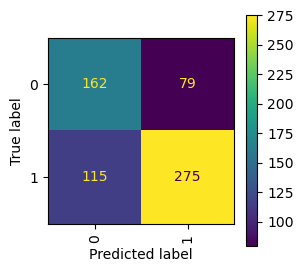

In [82]:
# Define SMOTE and KNN parameters
SMOTE_data = SMOTE(sampling_strategy=1.0,k_neighbors=5) # best SMOTE parameters found in Grid Search above
kNN = KNeighborsClassifier(n_neighbors=3)  # same K as the original model

pipeline = Pipeline([
    ('sampler', SMOTE_data),
    ('classifier', kNN)
])

# Create a cross-validation split with a fixed random state
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross validation with KNN classifier
print("CV KNN Classifier \n")
y_pred = cross_val_predict(pipeline, X, y, cv=cv) # Perform cross-validation and get predicted labels
print(classification_report(y, y_pred)) # Print classification report with the aggregate result

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(3,3)) 
disp = ConfusionMatrixDisplay.from_predictions(y,y_pred, ax = ax, xticks_rotation = 'vertical')

# Calculate the proportion of prediction by classes
unique, counts = np.unique(y_pred, return_counts=True)
proportions = np.round(counts / counts.sum(),2)
result = dict(zip(unique, proportions))    
print(f'Proportion of predictions: {result}')
print("\n")

Compared to the original model (no SMOTE and no parameter tuning), I can also see a reduction in Recall difference between the 2 classes. There is also a drop in overall model accuracy and false positives. 

However, this model is performing worse than the previous fine-tuned model (with SMOTE and tuned parameters). Recall scores for both classes and the overall accuracy in this model are worse than the fine-tuned model, showing that tuning the parameters unique to each model is critical in model optimisation.

Also, each classifier (KNN, decision tree, etc.) comes with their unique set of parameters. We must thoroughly understand the behaviours of each algorithm and their corresponding parameters in order to maximise the gains we can get from parameter tuning. Finally, these metrics are directional and not definitive in guiding our optimisation efforts as each time we run the model, the metrics change slightly due to the small dataset and metric variance. So we must view small differences with caution, even if cross validation has been done.